In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
# File path GMET station data (CSV format with columns:'Precipitation (mm)')
gmet_root_dir = r'combined_station_data_GMET.csv'
tahmo_root_dir = r'combined_station_data_tahmo.csv'

In [3]:
drop_data_gmet = ['Ada_Foah', 'Tarkwa', 'Abetifi', 'Sefwi_Bekwai', 'Loagri', 'Kalbeo', 'Jirapa']
drop_data_tahmo = ['TA00117', 'TA00302', 'TA00007', 'TA00010', 'TA00266', 'TA00259', 'TA00690', 'TA00254', 'TA00647']

In [4]:
#combined_station_data_tahmo.to_csv('combined_station_data_tahmo.csv')
combined_station_data_gmet = pd.read_csv(gmet_root_dir, index_col = 0, parse_dates = True)

for station in drop_data_gmet:
    if station in combined_station_data_gmet.columns:
        combined_station_data_gmet = combined_station_data_gmet.drop(station, axis = 1)

combined_station_data_tahmo = pd.read_csv(tahmo_root_dir, index_col = 0, parse_dates = True)
for station in drop_data_tahmo:
    if station in combined_station_data_tahmo.columns:
        combined_station_data_tahmo = combined_station_data_tahmo.drop(station, axis = 1)

In [5]:
df_pred_gmet = pd.read_csv('df_output_MSE_gmet_test.csv', index_col = 0, parse_dates = True)
df_pred_gmet[df_pred_gmet <= 0.02] = 0
df_pred_gmet = df_pred_gmet.drop(drop_data_gmet, axis = 1)

df_pred_balanced_gmet = pd.read_csv('df_output_balanced_gmet_test.csv', index_col = 0, parse_dates = True)
df_pred_balanced_gmet[df_pred_balanced_gmet <= 0.02] = 0
df_pred_balanced_gmet = df_pred_balanced_gmet.drop(drop_data_gmet, axis = 1)

df_target_gmet = pd.read_csv('df_imerg_final_gmet.csv', index_col = 0, parse_dates = True)
df_target_gmet = df_target_gmet.drop(drop_data_gmet, axis = 1)
df_target_gmet = df_target_gmet.loc[df_target_gmet.index.intersection(df_pred_balanced_gmet.index)]

df_early_gmet = pd.read_csv('df_imerg_early_gmet.csv', index_col = 0, parse_dates = True)
df_early_gmet = df_early_gmet.drop(drop_data_gmet, axis = 1)
df_early_gmet = df_early_gmet.loc[df_early_gmet.index.intersection(df_pred_balanced_gmet.index)]

In [6]:
df_pred_tahmo = pd.read_csv('df_output_MSE_tahmo_test.csv', index_col = 0, parse_dates = True)
df_pred_tahmo[df_pred_tahmo <= 0.02] = 0
df_pred_tahmo = df_pred_tahmo.drop(drop_data_tahmo, axis = 1)

df_pred_balanced_tahmo = pd.read_csv('df_output_balanced_tahmo_test.csv', index_col = 0, parse_dates = True)
df_pred_balanced_tahmo[df_pred_balanced_tahmo <= 0.02] = 0
df_pred_balanced_tahmo = df_pred_balanced_tahmo.drop(drop_data_tahmo, axis = 1)

df_target_tahmo = pd.read_csv('df_imerg_final_tahmo.csv', index_col = 0, parse_dates = True)
df_target_tahmo = df_target_tahmo.drop(drop_data_tahmo, axis = 1)
df_target_tahmo = df_target_tahmo.loc[df_target_tahmo.index.intersection(df_pred_balanced_tahmo.index)]

df_early_tahmo = pd.read_csv('df_imerg_early_tahmo.csv', index_col = 0, parse_dates = True)
df_early_tahmo = df_early_tahmo.drop(drop_data_tahmo, axis = 1)
df_early_tahmo = df_early_tahmo.loc[df_early_tahmo.index.intersection(df_pred_balanced_tahmo.index)]

In [7]:
for station_name in df_pred_tahmo.columns:
    df_pred_tahmo = df_pred_tahmo.rename(columns = {f'{station_name}' : f'{station_name}_gridcel'})

for station_name in df_pred_balanced_tahmo.columns:
    df_pred_balanced_tahmo = df_pred_balanced_tahmo.rename(columns = {f'{station_name}' : f'{station_name}_gridcel'})
    
for station_name in df_target_tahmo.columns:
    df_target_tahmo = df_target_tahmo.rename(columns = {f'{station_name}' : f'{station_name}_gridcel'})

for station_name in df_early_tahmo.columns:
    df_early_tahmo = df_early_tahmo.rename(columns = {f'{station_name}' : f'{station_name}_gridcel'})

In [8]:
for station_name in df_pred_gmet.columns:
    df_pred_gmet = df_pred_gmet.rename(columns = {f'{station_name}' : f'{station_name}_gridcel'})

for station_name in df_pred_balanced_gmet.columns:
    df_pred_balanced_gmet = df_pred_balanced_gmet.rename(columns = {f'{station_name}' : f'{station_name}_gridcel'})

for station_name in df_target_gmet.columns:
    df_target_gmet = df_target_gmet.rename(columns = {f'{station_name}' : f'{station_name}_gridcel'})

for station_name in df_early_gmet.columns:
    df_early_gmet = df_early_gmet.rename(columns = {f'{station_name}' : f'{station_name}_gridcel'})

In [9]:
df_station_grid_gmet = pd.merge(df_pred_gmet, combined_station_data_gmet, left_index=True, right_index=True, how = 'outer')
df_station_grid_balanced_gmet = pd.merge(df_pred_balanced_gmet, combined_station_data_gmet, left_index=True, right_index=True, how = 'outer')

df_station_grid_target_gmet = pd.merge(df_target_gmet, combined_station_data_gmet, left_index=True, right_index=True, how = 'outer')
df_station_grid_early_gmet = pd.merge(df_early_gmet, combined_station_data_gmet, left_index=True, right_index=True, how = 'outer')

In [10]:
df_station_grid_tahmo = pd.merge(df_pred_tahmo, combined_station_data_tahmo, left_index=True, right_index=True, how = 'outer')
df_station_grid_balanced_tahmo = pd.merge(df_pred_balanced_tahmo, combined_station_data_tahmo, left_index=True, right_index=True, how = 'outer')
df_station_grid_target_tahmo = pd.merge(df_target_tahmo, combined_station_data_tahmo, left_index=True, right_index=True, how = 'outer')
df_station_grid_early_tahmo = pd.merge(df_early_tahmo, combined_station_data_tahmo, left_index=True, right_index=True, how = 'outer')

In [11]:
df_station_grid_total = pd.merge(df_station_grid_tahmo, df_station_grid_gmet, left_index=True, right_index=True, how = 'outer')
df_station_grid_balanced_total = pd.merge(df_station_grid_balanced_tahmo, df_station_grid_balanced_gmet, left_index=True, right_index=True, how = 'outer')
df_station_grid_target_total = pd.merge(df_station_grid_target_tahmo, df_station_grid_target_gmet, left_index=True, right_index=True, how = 'outer')
df_station_grid_early_total = pd.merge(df_station_grid_early_tahmo, df_station_grid_early_gmet, left_index=True, right_index=True, how = 'outer')

In [12]:
def boxplot(df_station_grid, corr_matrix):
    # Filter columns and rows for the nearest gridcell and corresponding station
    station_to_gridcell_pairs = [
        (station, f"{station}_gridcel") for station in df_station_grid.columns if station in corr_matrix.index
    ]
    
    # Extract correlations for station-to-gridcell pairs
    relevant_corrs = []
    for station, gridcell in station_to_gridcell_pairs:
        if station in corr_matrix.index and gridcell in corr_matrix.columns:
            relevant_corrs.append(corr_matrix.at[station, gridcell])
    
    # Create the boxplot if there are any correlations
    if relevant_corrs:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=relevant_corrs, color='skyblue')
        plt.title('Boxplot of correlations between stations and corresponding gridcells')
        plt.xlabel('Correlation Coefficient')
        plt.show()
    else:
        print("No correlations to plot.")

In [13]:
# def boxplot_multiple(models, df_station_grid, output_name):
#     """
#     Create a grouped boxplot to compare correlations between multiple models.
    
#     Args:
#     models (dict): A dictionary where keys are model names (str) and values are correlation matrices (pd.DataFrame).
#     df_station_grid (pd.DataFrame): The input data used to identify station-to-gridcell pairs.
#     """
#     # Initialize a list to hold data for plotting
#     plot_data = []
#     labels = []
    
#     for model_name, corr_matrix in models.items():
#         # Filter columns and rows for the nearest gridcell and corresponding station
#         station_to_gridcell_pairs = [
#             (station, f"{station}_gridcel") for station in df_station_grid.columns if station in corr_matrix.index
#         ]
        
#         # Extract correlations for station-to-gridcell pairs
#         relevant_corrs = []
#         for station, gridcell in station_to_gridcell_pairs:
#             if station in corr_matrix.index and gridcell in corr_matrix.columns:
#                 relevant_corrs.append(corr_matrix.at[station, gridcell])
        
#         # Append data for plotting
#         plot_data.extend(relevant_corrs)
#         labels.extend([model_name] * len(relevant_corrs))
    
#     # Convert labels to categorical
#     labels = pd.Categorical(labels, categories=models.keys())
    
#     # Create the grouped boxplot
#     if plot_data:
#         plt.figure(figsize=(10, 6))
#         sns.boxplot(x=labels, y=plot_data, palette="Set2")
#         plt.title('Pixel point comparison to stations of correlations across models')
#         plt.xlabel('Model')
#         plt.ylabel('Correlation Coefficient')

#         plt.savefig(f'{output_name}.png')
#         plt.show()

        
#     else:
#         print("No correlations to plot.")

In [14]:
def boxplot_multiple(models, df_station_grid, output_name):
    """
    Create a grouped boxplot to compare correlations between multiple models.
    
    Args:
    models (dict): A dictionary where keys are model names (str) and values are correlation matrices (pd.DataFrame).
    df_station_grid (pd.DataFrame): The input data used to identify station-to-gridcell pairs.
    """
    # Initialize a list to hold data for plotting
    plot_data = []
    labels = []
    
    for model_name, corr_matrix in models.items():
        # Filter columns and rows for the nearest gridcell and corresponding station
        station_to_gridcell_pairs = [
            (station, f"{station}_gridcel") for station in df_station_grid.columns if station in corr_matrix.index
        ]
        
        # Extract correlations for station-to-gridcell pairs
        relevant_corrs = []
        for station, gridcell in station_to_gridcell_pairs:
            if station in corr_matrix.index and gridcell in corr_matrix.columns:
                relevant_corrs.append(corr_matrix.at[station, gridcell])

        
        # Append data for plotting
        plot_data.extend(relevant_corrs)
        labels.extend([model_name] * len(relevant_corrs))
    
    # Convert labels to categorical
    labels = pd.Categorical(labels, categories=models.keys())
    
    
    # Create the grouped boxplot
    if plot_data:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=labels, y=plot_data, palette="Set2")
        plt.title(f'Pearson correlation coefficient across different stations (n = {len(relevant_corrs)})', fontsize = 20, pad = 20)
        plt.xlabel('Model', fontsize = 20)
        plt.ylabel('r', fontsize = 20)
        plt.xticks(fontsize=16, rotation=45)  # X-tick labels
        plt.yticks(fontsize=16)  # Y-tick labels
        plt.ylim(-0.05, 1)
        plt.savefig(f'{output_name}.png', bbox_inches='tight', dpi=300)
        plt.show()

        
    else:
        print("No correlations to plot.")

In [15]:
def monthly_correlation_boxplot(dataframe, resample, min_count):
    """
    Create boxplots of correlations between stations and their corresponding gridcells for each month.

    Args:
    dataframe (pd.DataFrame): Input data with time as the index, including both station and gridcell columns.
    """
    # Add month column from the datetime index
    dataframe['month'] = dataframe.index.month

    # Initialize a dictionary to hold correlations for each month
    monthly_correlations = {month: [] for month in range(1, 13)}

    # Group the data by month
    for month, group in dataframe.groupby('month'):
        # Calculate the correlation matrix for the current month
        group = group.resample(resample).sum(min_count = min_count)
        corr_matrix = group.drop(columns=['month']).corr(method='pearson')
        
        # Extract station-to-gridcell correlations
        relevant_corrs = []
        for col in dataframe.columns:
            if col.endswith('_gridcel'):
                station = col.replace('_gridcel', '')
                if station in corr_matrix.index and col in corr_matrix.columns:
                    relevant_corrs.append(corr_matrix.at[station, col])
        
        # Store correlations for this month
        monthly_correlations[month].extend(relevant_corrs)

    # Prepare data for the boxplot
    plot_data = []
    labels = []

    for month, corrs in monthly_correlations.items():
        plot_data.extend(corrs)
        labels.extend([month] * len(corrs))

    # Check if there is data to plot
    if plot_data and labels:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=labels, y=plot_data)
        plt.title('Monthly Correlations Between Stations and Corresponding Gridcells')
        plt.xlabel('Month')
        plt.ylabel('Correlation Coefficient')
        plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
        plt.show()
    else:
        print("No data to plot. Check your inputs and ensure correlations exist.")


In [16]:

def correlation(dataframe, resample, min_count, plot = True):
# Calculate the correlation matrix

    dataframe_resampled = dataframe.resample(resample).sum(min_count = min_count)
    #dataframe_resampled.replace(0, np.nan, inplace=True)
    correlation_matrix = dataframe_resampled.corr(method = 'pearson')
    
    if plot == True:
    
        # Feature names for labeling
        labels = dataframe.columns
        
        
        
         # Create the plot
        fig, ax = plt.subplots(figsize=(10, 10))  # Set figure size
        cax = ax.matshow(correlation_matrix, cmap='coolwarm')  # Heatmap
        
        # Add a color bar
        plt.colorbar(cax)
        
        # Set axis ticks and labels
        ax.set_xticks(range(len(labels)))
        ax.set_yticks(range(len(labels)))
        ax.set_xticklabels(labels, rotation=90)  # Rotate x-axis labels for readability
        ax.set_yticklabels(labels)
        
        # Add text annotations
        for i in range(correlation_matrix.shape[0]):
            for j in range(correlation_matrix.shape[1]):
                value = correlation_matrix.iloc[i, j]
                if value >= 0.3 and value <= 0.99:
                    ax.text(j, i, f'{value:.2f}', va='center', ha='center', color='black')
        
        # Set plot title
        plt.title(f"Correlation Matrix {resample}")
        plt.show()
    
    return correlation_matrix

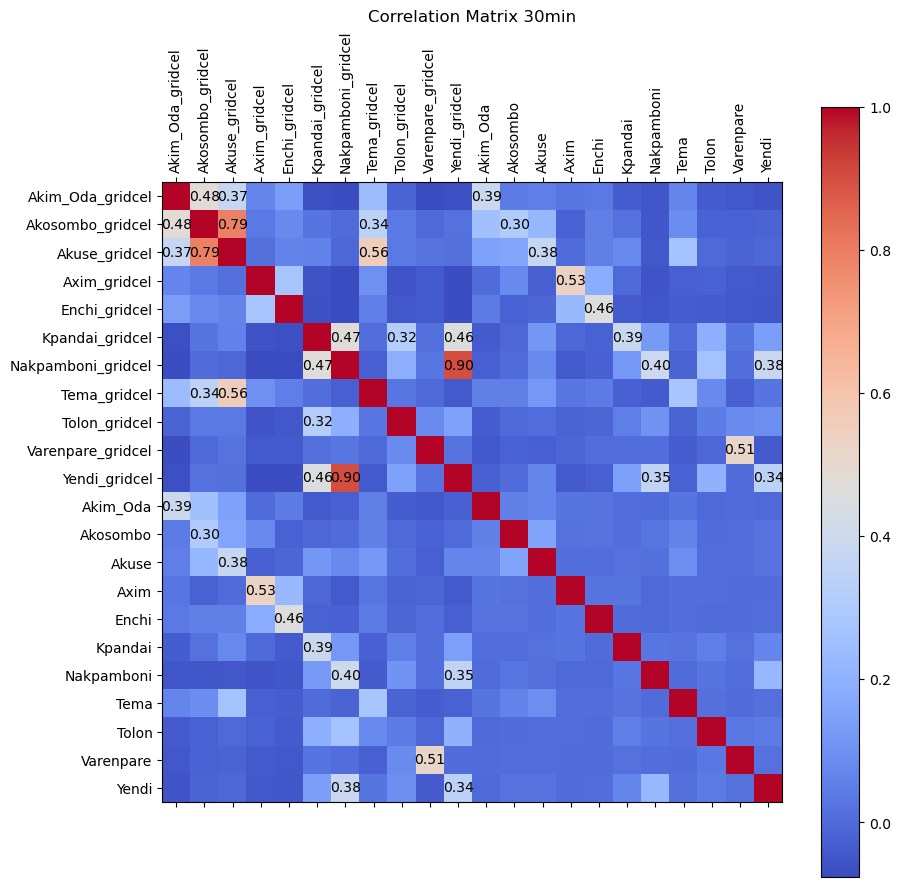

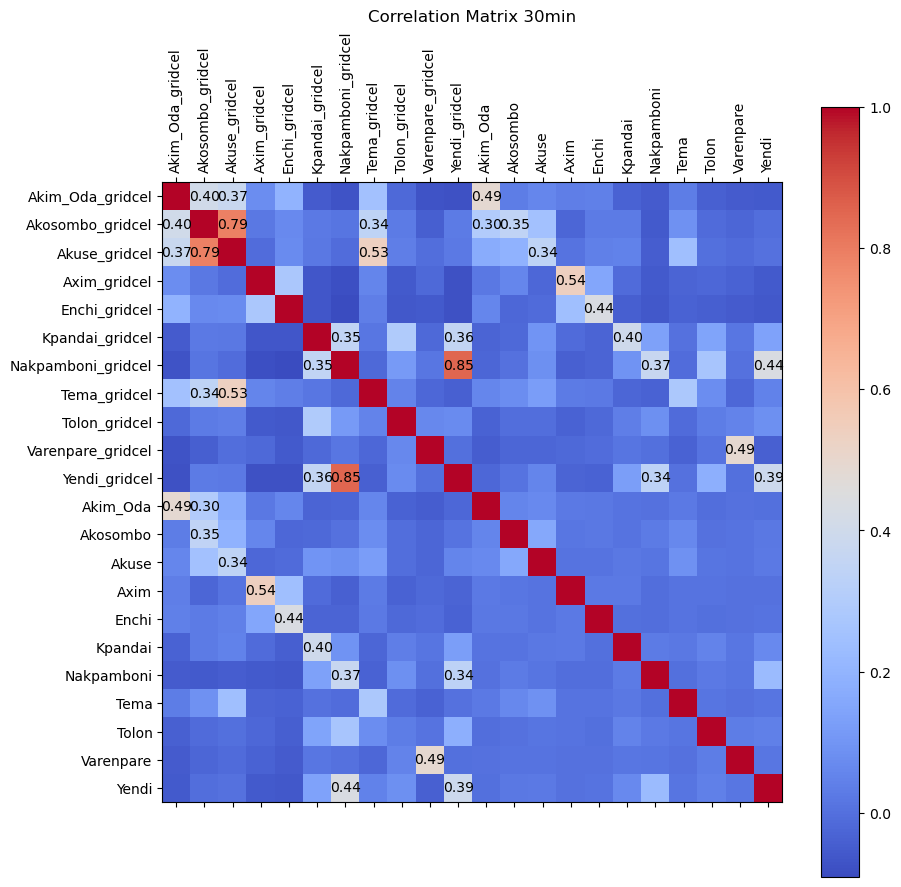

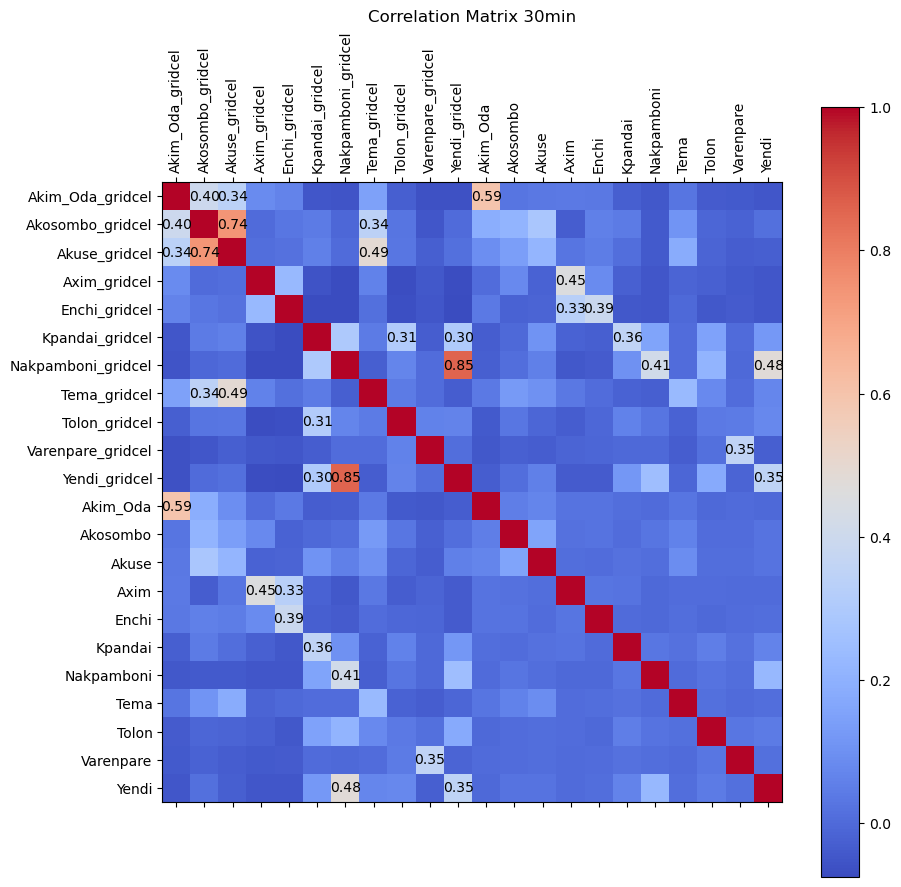

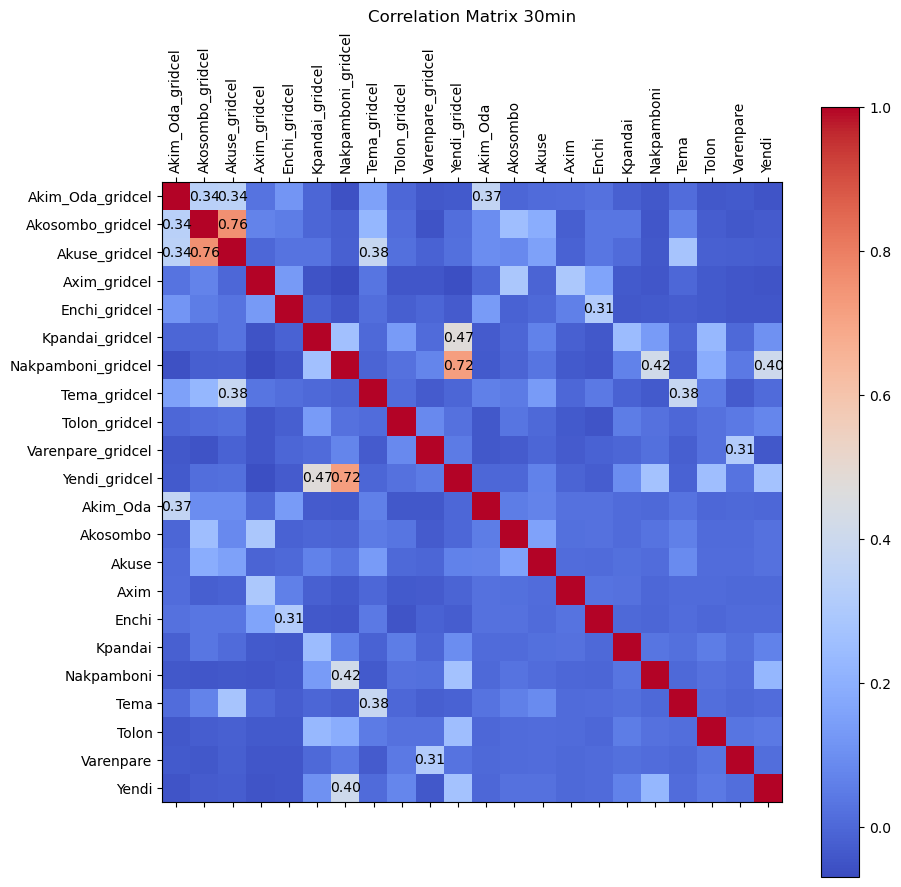

In [17]:
corr_matr_gmet_earth_30min = correlation(df_station_grid_gmet, '30min', 1)
corr_matr_gmet_earth_balanced_30min = correlation(df_station_grid_balanced_gmet, '30min', 1)
corr_matr_gmet_target_30min = correlation(df_station_grid_target_gmet, '30min', 1)
corr_matr_gmet_early_30min = correlation(df_station_grid_early_gmet, '30min', 1)

In [18]:
# boxplot(df_station_grid_gmet, corr_matr_gmet_earth_30min)

C:\Users\c.kwa\AppData\Local\Temp\ipykernel_13820\826961408.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=labels, y=plot_data, palette="Set2")


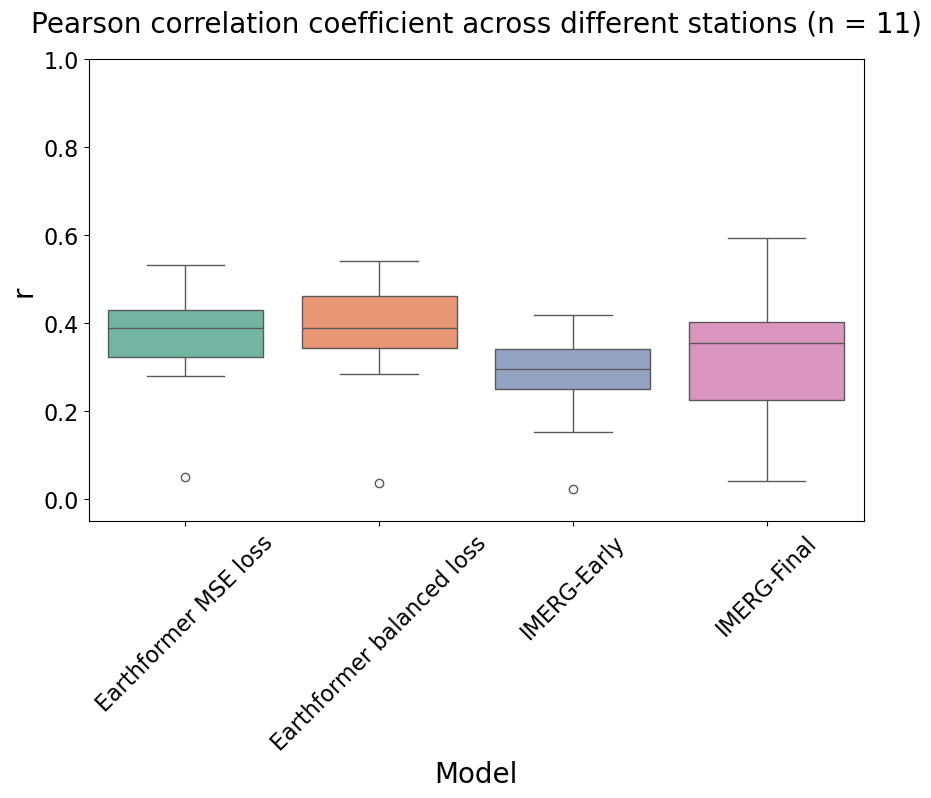

In [19]:
# Example usage
models = {
    "Earthformer MSE loss": corr_matr_gmet_earth_30min,
    "Earthformer balanced loss": corr_matr_gmet_earth_balanced_30min, 
    "IMERG-Early": corr_matr_gmet_early_30min, 
    "IMERG-Final": corr_matr_gmet_target_30min
}
boxplot_multiple(models, df_station_grid_gmet, 'pearson_corr_zeros_included_gmet_30min_test')

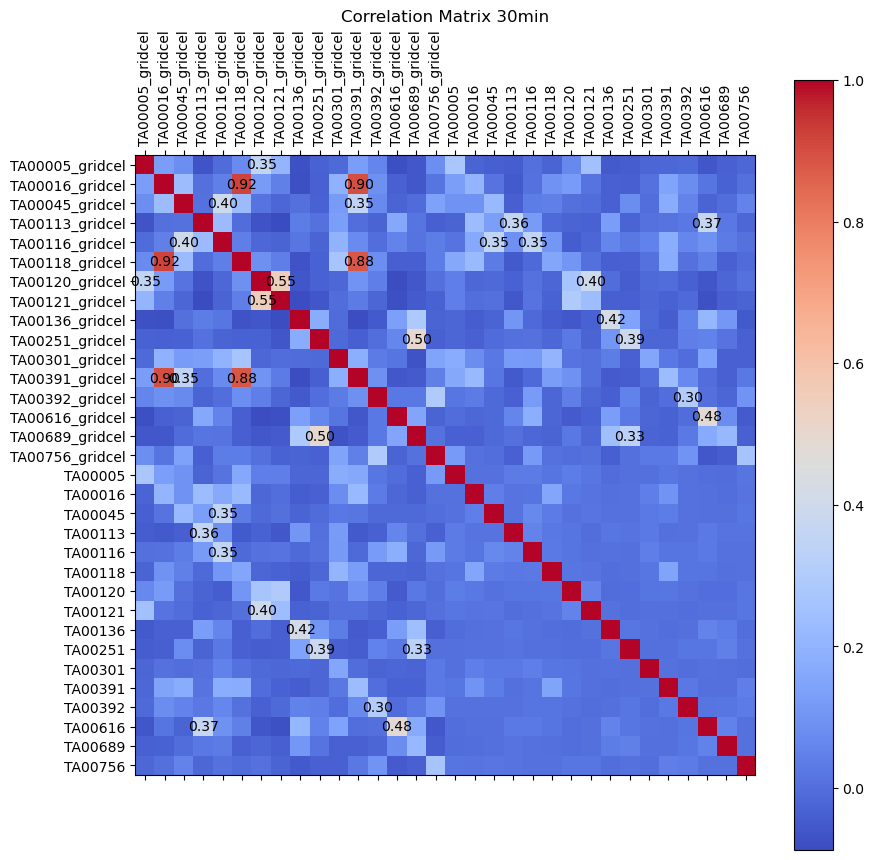

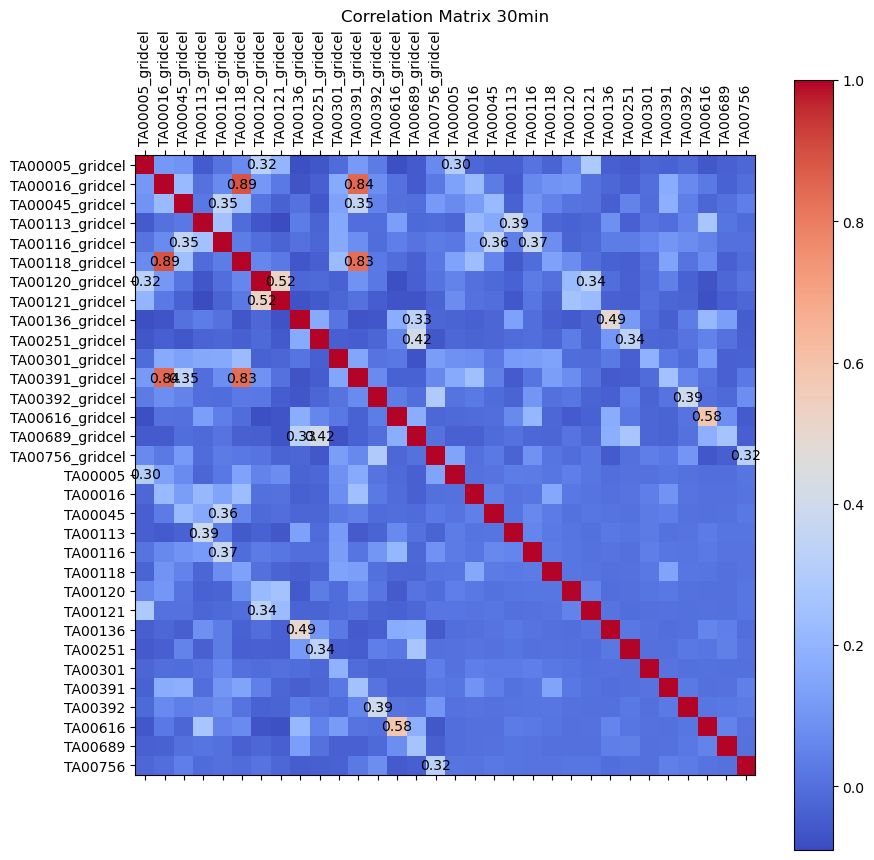

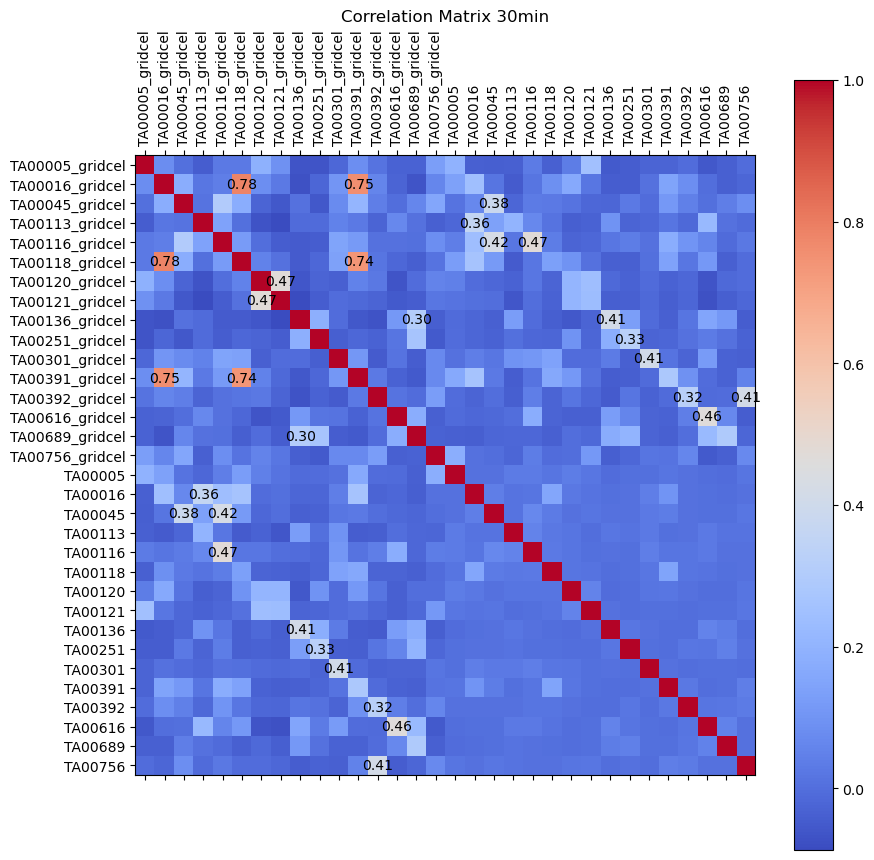

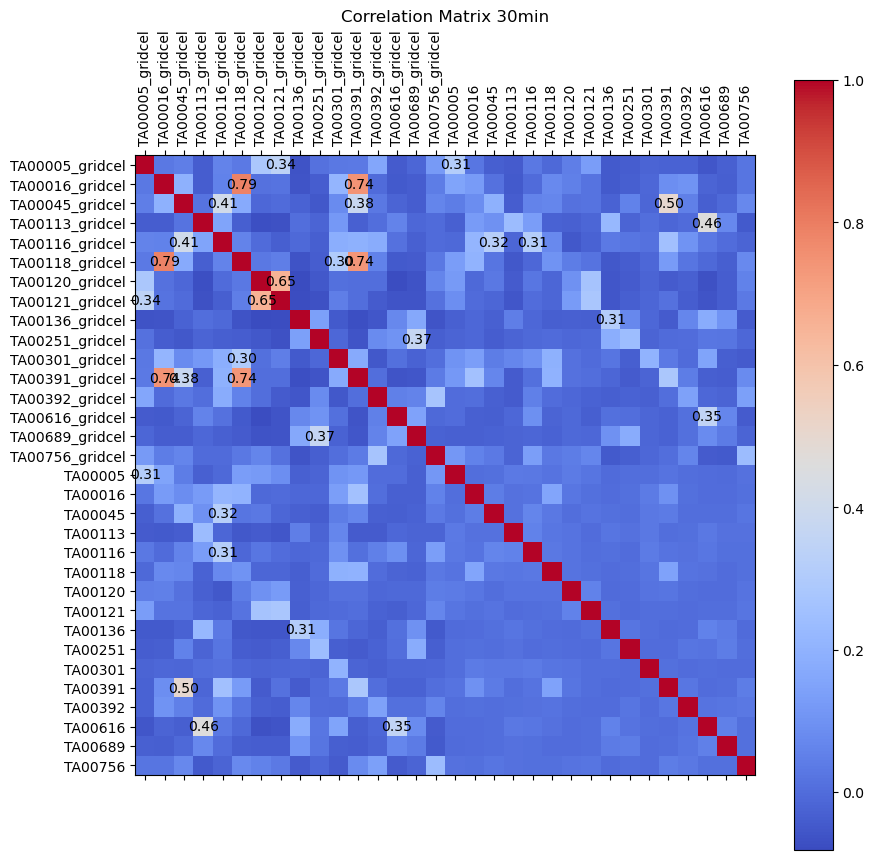

In [20]:
corr_matr_tahmo_earth_30min = correlation(df_station_grid_tahmo, '30min', 1)
corr_matr_tahmo_earth_balanced_30min = correlation(df_station_grid_balanced_tahmo, '30min', 1)
corr_matr_tahmo_target_30min = correlation(df_station_grid_target_tahmo, '30min', 1)
corr_matr_tahmo_early_30min = correlation(df_station_grid_early_tahmo, '30min', 1)

C:\Users\c.kwa\AppData\Local\Temp\ipykernel_13820\826961408.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=labels, y=plot_data, palette="Set2")


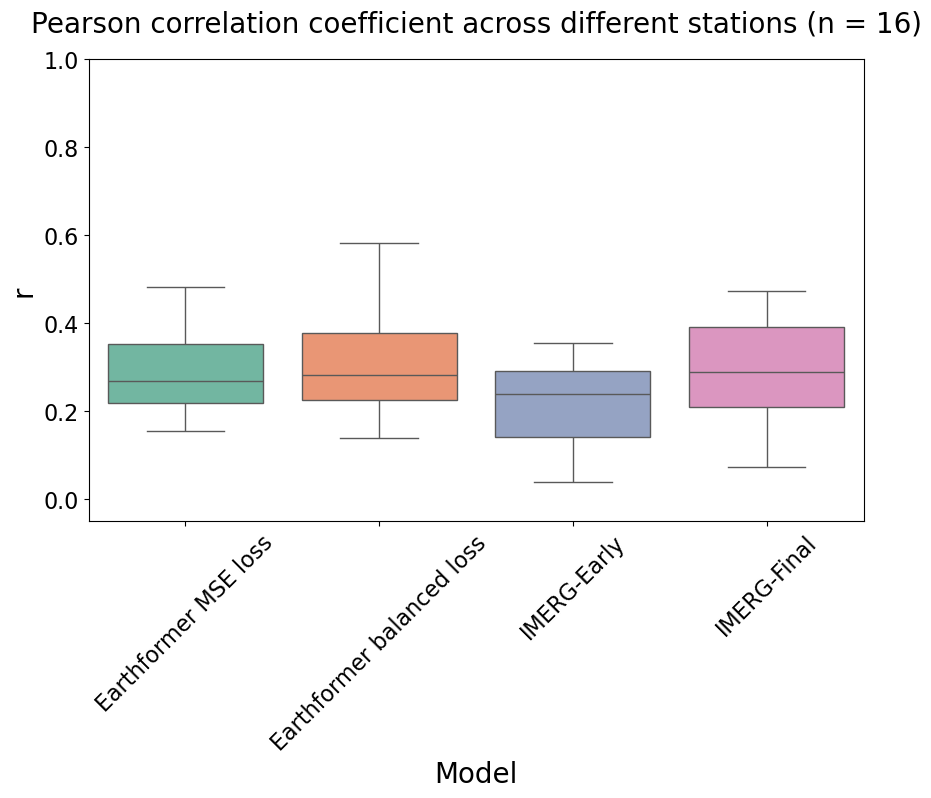

In [21]:
# Example usage
models = {
    "Earthformer MSE loss": corr_matr_tahmo_earth_30min,
    "Earthformer balanced loss": corr_matr_tahmo_earth_balanced_30min, 
    "IMERG-Early": corr_matr_tahmo_early_30min, 
    "IMERG-Final": corr_matr_tahmo_target_30min
}
boxplot_multiple(models, df_station_grid_tahmo, 'pearson_corr_zeros_included_tahmo_30min_test')

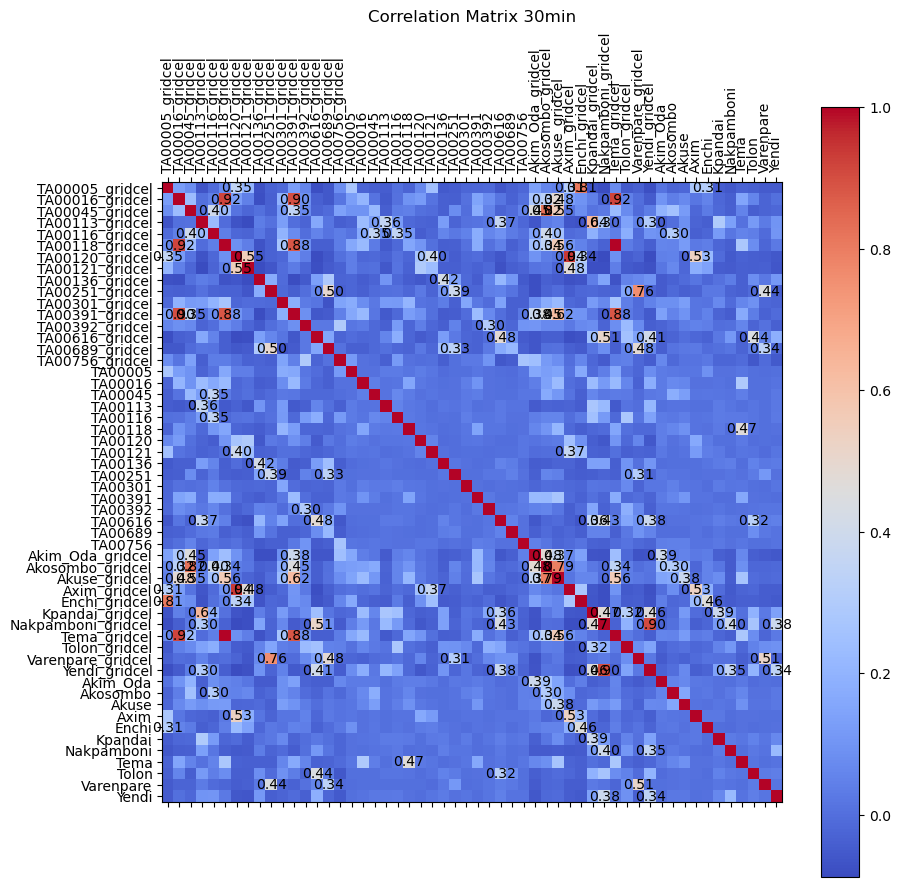

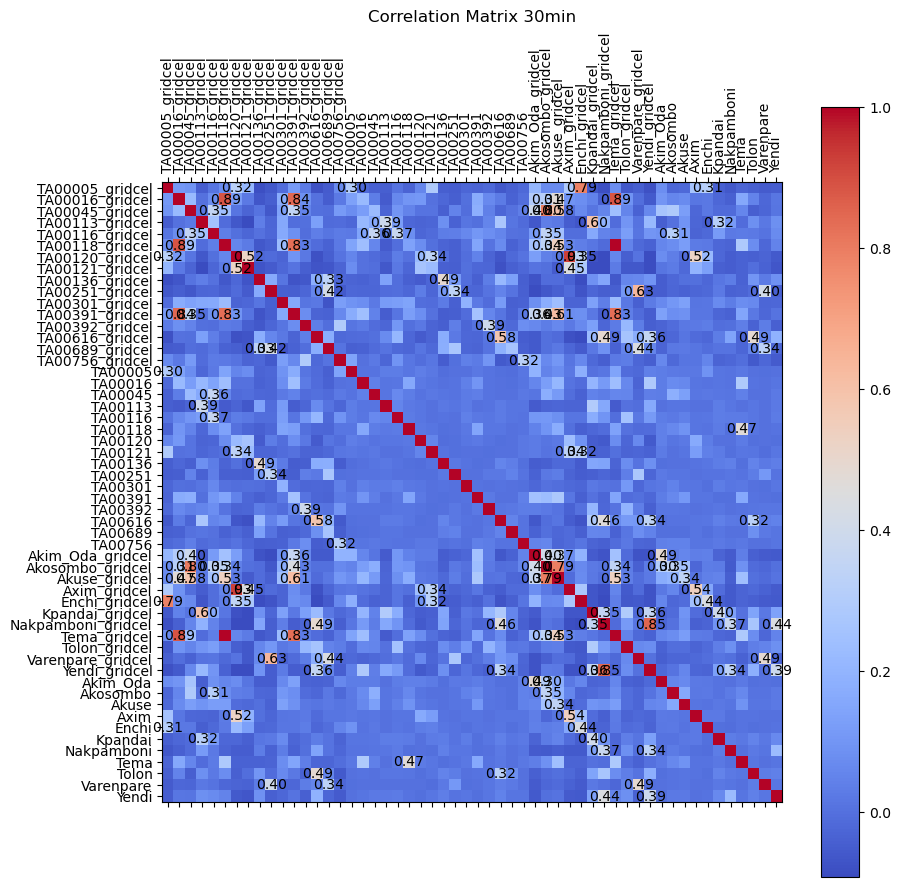

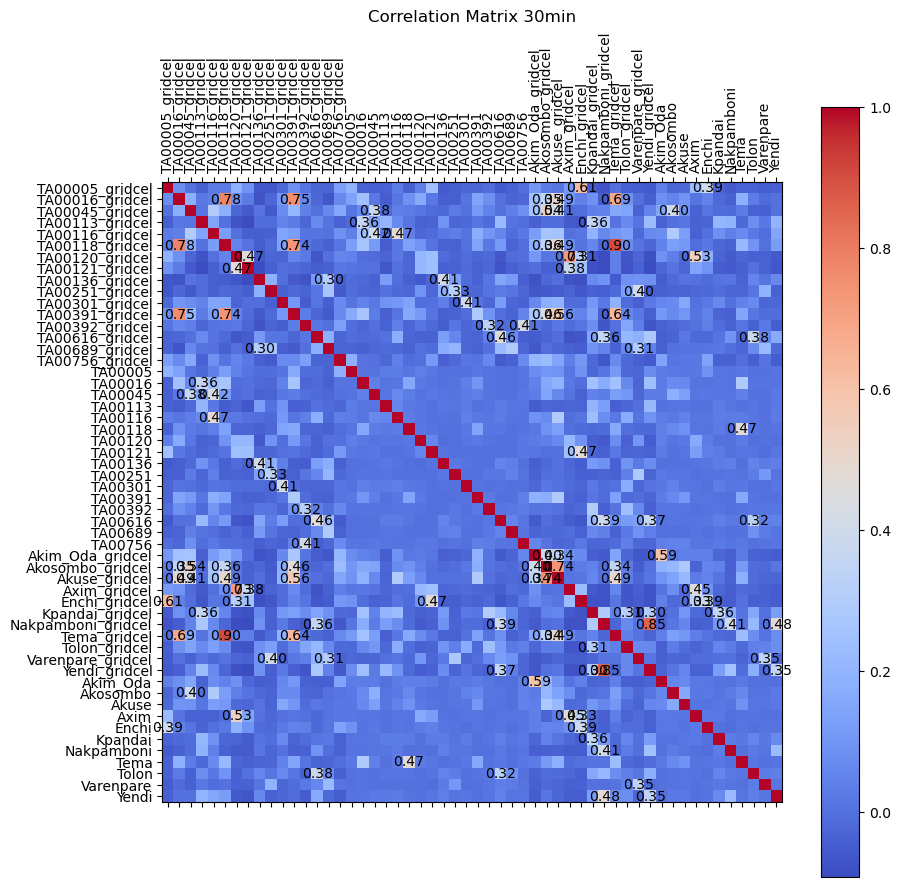

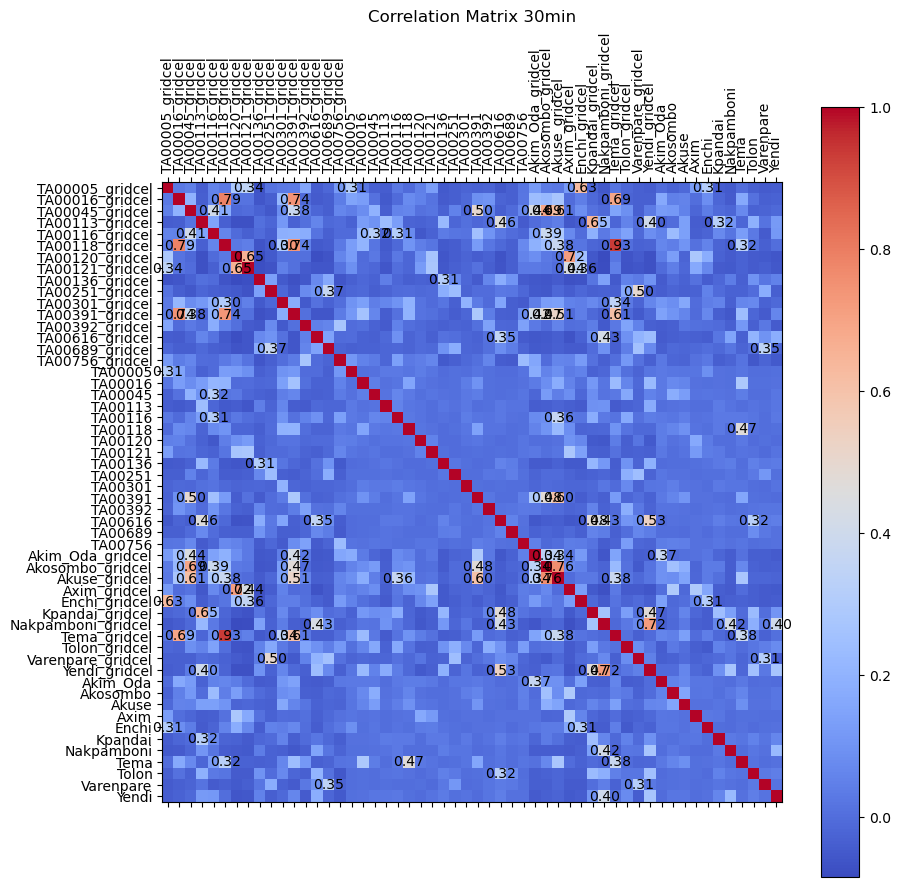

In [22]:
corr_matr_total_earth_30min = correlation(df_station_grid_total, '30min', 1)
corr_matr_total_earth_balanced_30min = correlation(df_station_grid_balanced_total, '30min', 1)
corr_matr_total_target_30min = correlation(df_station_grid_target_total, '30min', 1)
corr_matr_total_early_30min = correlation(df_station_grid_early_total, '30min', 1)

C:\Users\c.kwa\AppData\Local\Temp\ipykernel_13820\826961408.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=labels, y=plot_data, palette="Set2")


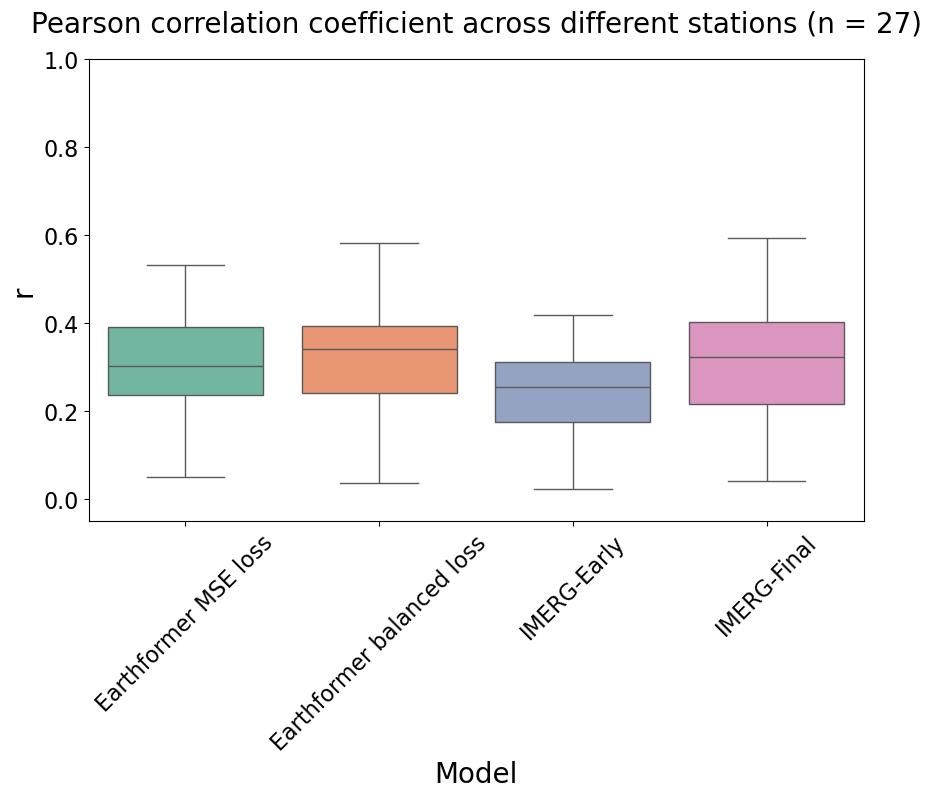

In [23]:
# Example usage
models = {
    "Earthformer MSE loss": corr_matr_total_earth_30min,
    "Earthformer balanced loss": corr_matr_total_earth_balanced_30min, 
    "IMERG-Early": corr_matr_total_early_30min, 
    "IMERG-Final": corr_matr_total_target_30min
}
boxplot_multiple(models, df_station_grid_total, 'pearson_corr_zeros_included_all_30min_test')